In [1]:
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
scipy: 0.19.0
numpy: 1.12.1
matplotlib: 2.0.2
pandas: 0.20.1
sklearn: 0.18.1


In [11]:
%matplotlib inline
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas
import warnings
warnings.filterwarnings('ignore')
path="C:/a/"
X=[]
y=[]
for directory in os.listdir(path):
    for file in os.listdir(path+directory):
        img=Image.open(path+directory+"/"+file)
        #print (img)
        width, height = img.size
        for i in range(width):
            for j in range(height):
                featurevector= img.getpixel((i,j))
        X.append(featurevector)
        if directory == "0":
            label = 0
        if directory == "1":
            label = 1
        if directory == "2":
            label = 2
        if directory == "3":
            label = 3
        if directory == "4":
            label = 4
        if directory == "5":
            label = 5
        if directory == "6":
            label = 6
        if directory == "7":
            label = 7
        if directory == "8":
            label = 8
        y.append(label)      

In [12]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
validation_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=validation_size, random_state= 7)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)

(54, 3)


In [15]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(activation='relu', alpha=0.01, batch_size='auto',hidden_layer_sizes=(10,10),max_iter=600)
nn.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=600, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [16]:
predictions = nn.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[4 0 0 0 0 0 0 0]
 [0 4 0 0 0 1 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 0 5 0 0 0]
 [0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 3]]


In [18]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      0.80      0.89         5
          2       1.00      1.00      1.00         3
          3       1.00      1.00      1.00         3
          4       1.00      1.00      1.00         5
          6       0.75      1.00      0.86         3
          7       1.00      1.00      1.00         1
          8       1.00      1.00      1.00         3

avg / total       0.97      0.96      0.96        27



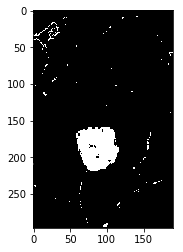

In [26]:
%matplotlib inline
from PIL import ImageFilter
from PIL import Image, ImageEnhance
img=Image.open("C:/test/04.jpg")
width, height = img.size
for i in range(width):
    for j in range(height):
        t = nn.predict(scaler.transform(img.getpixel((i,j))))
        if t == 8:
            img.putpixel((i,j),(255,255,255))
        else:
            img.putpixel((i,j),(0,0,0))
img.save("C:/segmented/444.png")
plt.imshow(img)

In [27]:
img1 = cv2.imread('C:/segmented/444.png')
img2 = cv2.imread('C:/segmented/44.jpg')
img1 = cv2.medianBlur(img1,5)
i = cv2.bitwise_and(img1,img2)
cv2.imwrite('C:/segmented/final.jpg',i)

True